
# 🧩 Divide and Conquer Without Recursion

This notebook demonstrates how to implement **Divide and Conquer algorithms** even when recursion is not allowed — by simulating recursion manually or using bottom-up iteration.


## ⚙️ 1. Merge Sort — Recursive Version

In [1]:

def merge_sort_recursive(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = merge_sort_recursive(arr[:mid])
    right = merge_sort_recursive(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = [] # this should guarantee OUT OF PLACE - why?
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i]); i += 1
        else:
            result.append(right[j]); j += 1
    result += left[i:] + right[j:]
    return result

arr = [8, 3, 5, 2, 9, 1]
print(f"Original: {arr}")
print(f"Sorted (recursive): {merge_sort_recursive(arr)}")


Original: [8, 3, 5, 2, 9, 1]
Sorted (recursive): [1, 2, 3, 5, 8, 9]


## ⚙️ 2. Merge Sort — Iterative (Bottom-Up) Version

In [8]:
# turns out iterative solution is not that much longer in case of merge sort
def merge_sort_iterative(arr):
    arr = arr.copy() # this is O(n) and now we have a copy
    width = 1
    n = len(arr)
    while width < n:
        for i in range(0, n, 2*width): # should be O(n)
            left = arr[i:i+width]
            right = arr[i+width:i+2*width]
            arr[i:i+2*width] = merge(left, right)
        width *= 2 # so we keep doubling the width thus our outer loop will be O(log n)
    return arr

arr = [8, 3, 5, 2, 9, 1]
print(f"Original: {arr}")
print(f"Sorted (iterative): {merge_sort_iterative(arr)}")


Original: [8, 3, 5, 2, 9, 1]
Sorted (iterative): [1, 2, 3, 5, 8, 9]


In [9]:
# let's generate some random numbers for 1000, 10k, 100k, and 1M using seed 2025
from random import randint, seed
# seed
seed(2025)
# generate random numbers
random_1k = [randint(0, 100_000_000) for _ in range(1000)]
random_10k = [randint(0, 100_000_000) for _ in range(10_000)]
random_100k = [randint(0, 100_000_000) for _ in range(100_000)]
random_1M = [randint(0, 100_000_000) for _ in range(1_000_000)]
# print first 10 numbers of 1k
print(f"1k: {random_1k[:10]}")
#


1k: [74860229, 11100100, 86683836, 64103220, 23257880, 71039933, 60049, 49829715, 50419218, 76465021]


In [4]:
# so let's time 1k on recursive merge sort
%%timeit
merge_sort_recursive(random_1k)

2.09 ms ± 339 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
# double check that 1k is still unsorted
print(f"1k: {random_1k[:10]}")

1k: [74860229, 11100100, 86683836, 64103220, 23257880, 71039933, 60049, 49829715, 50419218, 76465021]


In [10]:
# now let's time our iterative solution
%%timeit
merge_sort_iterative(random_1k)

2.19 ms ± 372 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
# check again that 1k is unsorted
print(f"1k: {random_1k[:10]}")

1k: [74860229, 11100100, 86683836, 64103220, 23257880, 71039933, 60049, 49829715, 50419218, 76465021]


In [12]:
# let's check 100k now
%%timeit
merge_sort_recursive(random_100k)

356 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
# now iterative
%%timeit
merge_sort_iterative(random_100k)

389 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## ⚙️ 3. Quicksort — Iterative Version Using Stack

In [14]:

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort_iterative(arr):
    stack = [(0, len(arr)-1)]
    while stack:
        low, high = stack.pop()
        if low < high:
            p = partition(arr, low, high)
            stack.append((low, p-1))
            stack.append((p+1, high))
    return arr

arr = [10, 7, 8, 9, 1, 5]
print(f"Original: {arr}")
print(f"Sorted (iterative quicksort): {quicksort_iterative(arr)}")


Original: [10, 7, 8, 9, 1, 5]
Sorted (iterative quicksort): [1, 5, 7, 8, 9, 10]


## 🧮 4. Timing Comparison

In [15]:

import timeit, random

data = [random.randint(0, 100000) for _ in range(2000)]

recursive_time = timeit.timeit(lambda: merge_sort_recursive(data.copy()), number=10)
iterative_time = timeit.timeit(lambda: merge_sort_iterative(data.copy()), number=10)

print(f"Recursive Merge Sort time: {recursive_time:.4f} s")
print(f"Iterative Merge Sort time: {iterative_time:.4f} s")


Recursive Merge Sort time: 0.0518 s
Iterative Merge Sort time: 0.0426 s


## 📊 5. Visual Comparison

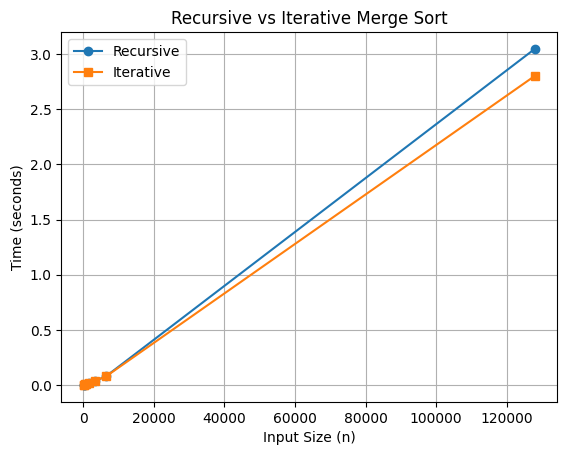

In [18]:

import matplotlib.pyplot as plt

sizes = [100, 200, 400, 800, 1600, 3200, 6400, 128000]
recursive_times = []
iterative_times = []

for n in sizes:
    data = [random.randint(0, 100_000_000) for _ in range(n)]
    recursive_times.append(timeit.timeit(lambda: merge_sort_recursive(data.copy()), number=5))
    iterative_times.append(timeit.timeit(lambda: merge_sort_iterative(data.copy()), number=5))

plt.plot(sizes, recursive_times, label='Recursive', marker='o')
plt.plot(sizes, iterative_times, label='Iterative', marker='s')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Recursive vs Iterative Merge Sort')
plt.legend()
plt.grid(True)
plt.show()



## 🧾 6. Summary

| Implementation | Recursion | State Tracking | Typical Use | Notes |
|----------------|------------|----------------|--------------|--------|
| Recursive D&C | ✅ | Implicit via call stack | Conceptual clarity | Elegant but limited by recursion depth |
| Iterative D&C | ❌ | Explicit via loops/stacks | Production systems | Often faster and safer for large inputs |

**Key Takeaway:**  
> Divide and Conquer is not tied to recursion — recursion is simply a *language-level convenience*.  
> Any recursive algorithm can be implemented iteratively by managing the call stack yourself.
